<a href="https://colab.research.google.com/github/manasik29/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Universities.csv')
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [2]:
df.shape

(25, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


**EDA**

In [4]:
#check for missing values
df.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

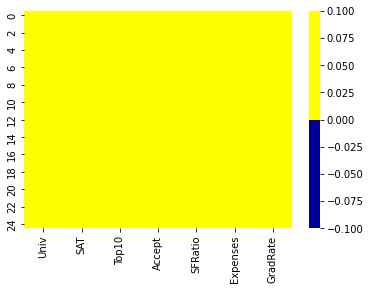

In [5]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for non missing, blue for missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))


We can coclude no missing values.

In [6]:
#check for duplicate values
df[df.duplicated()].shape

(0, 7)

In [7]:
df[df.duplicated()]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate


We can conclude no duplicate values in data.

In [8]:
#check dtypes of all columns
df.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

All columns dtypes are correct for now. We will change the dtypes if required later in the assignment.


In [9]:
#descriptive stats of numrical columns
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


# Hierarchical Clustering

Normalization of data

In [10]:
def norm_func(i):
  x = (i - i.min())/(i.max() - i.min())
  return(x)

In [11]:
#Normalized dataframe (only using numerical columns)
df_norm = norm_func(df.iloc[:,1:])

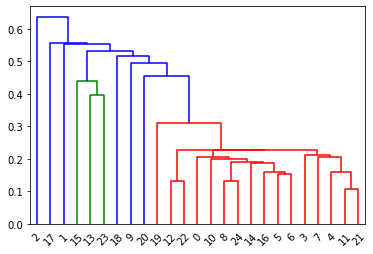

In [12]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [14]:
#creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage= 'single')

In [16]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [18]:
Clusters

,Clusters
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [20]:
df['h_clusterid'] = Clusters

In [21]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


# K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
df1 = pd.read_csv('/content/Universities.csv')

In [25]:
#Normalization Function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1.iloc[:,1:])

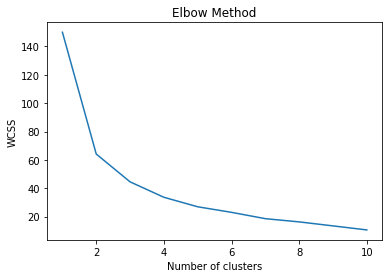

In [32]:
#How to find optimum number of clusters

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [36]:
from pandas.core.common import random_state
clusters_new = KMeans(4, random_state=32)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=32)

In [37]:
clusters_new.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [41]:
df1['h_clusterid'] = clusters_new.labels_

In [42]:
df1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [44]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1268.681818,77.318182,37.681818,12.636364,26699.772727,88.545455
1,1,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000
2,2,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000
3,3,1415.000000,100.000000,25.000000,6.000000,63575.000000,81.000000
